In [89]:
#import necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [39]:
#read dataset
df = pd.read_excel("Desktop/data/train_data.xlsx")

In [ ]:
#understanding the data

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [41]:
df.shape

(1309, 12)

In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
#cleaning the data

In [41]:
#find duplicates
df.duplicated().sum()
#no duplicate values

0

In [55]:
df.sort_values(by='PassengerId')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [57]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [ ]:
#missing values are under the columns age,cabin,fare.

In [59]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.000000
dtype: float64

In [67]:
#handling columns with null values
#drop values
df = df.drop(['Cabin'], axis=1)

In [51]:
df.head()
#check for the column values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [85]:
#identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts(1))
    print("***"*10)

Name
Connolly, Miss. Kate                                   0.001528
Kelly, Mr. James                                       0.001528
Braund, Mr. Owen Harris                                0.000764
Johnson, Master. Harold Theodor                        0.000764
Gustafsson, Mr. Alfred Ossian                          0.000764
                                                         ...   
Carter, Miss. Lucile Polk                              0.000764
Silvey, Mr. William Baird                              0.000764
Kallio, Mr. Nikolai Erland                             0.000764
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    0.000764
Peter, Master. Michael J                               0.000764
Name: proportion, Length: 1307, dtype: float64
******************************
Sex
male      0.644003
female    0.355997
Name: proportion, dtype: float64
******************************
Ticket
CA. 2343        0.008403
CA 2144         0.006112
1601            0.006112
PC 17608        0.005348


In [95]:
# Encode 'Fare', 'Ticket' and 'Embarked'
df['Fare'] = LabelEncoder().fit_transform(df['Fare'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'].fillna('Missing'))


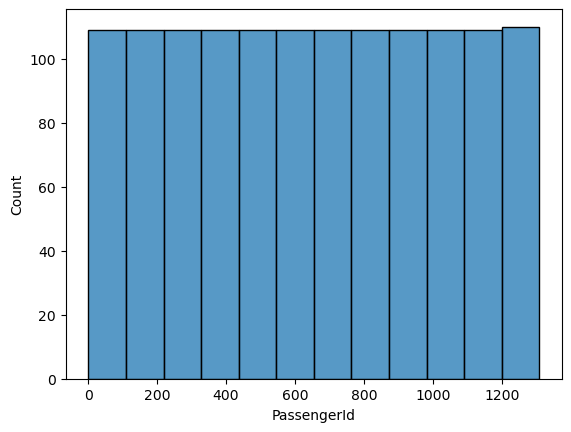

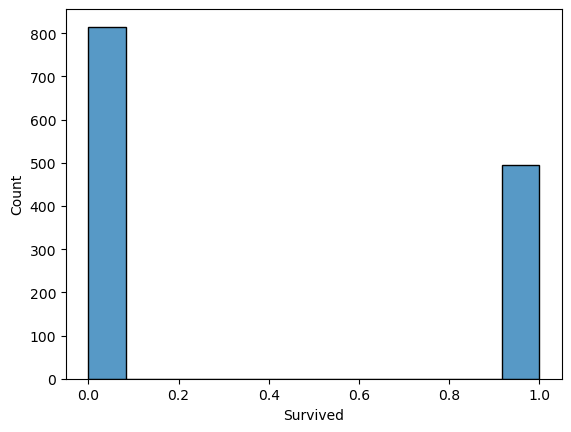

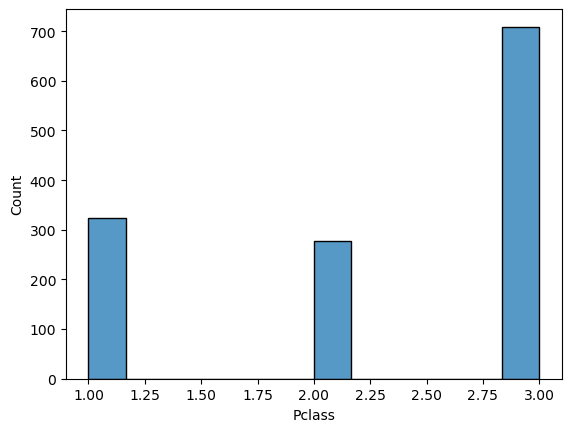

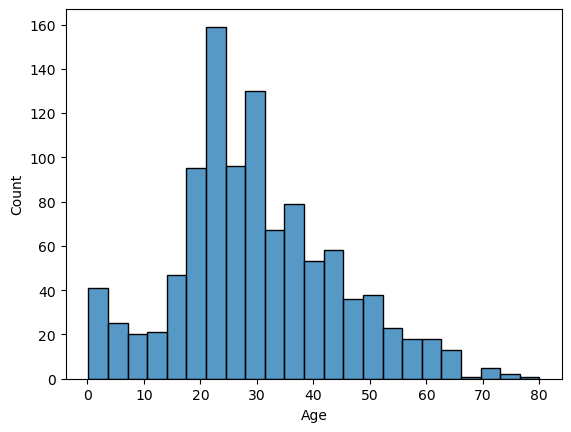

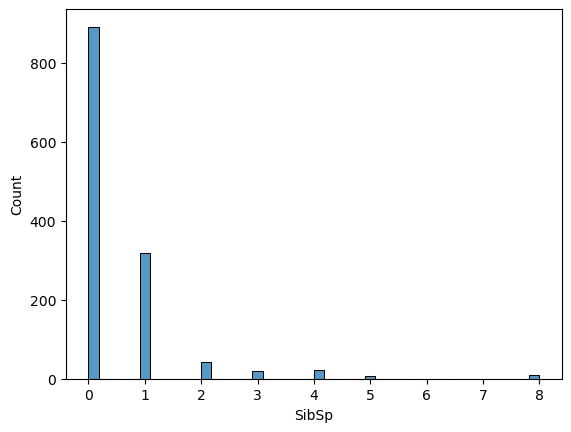

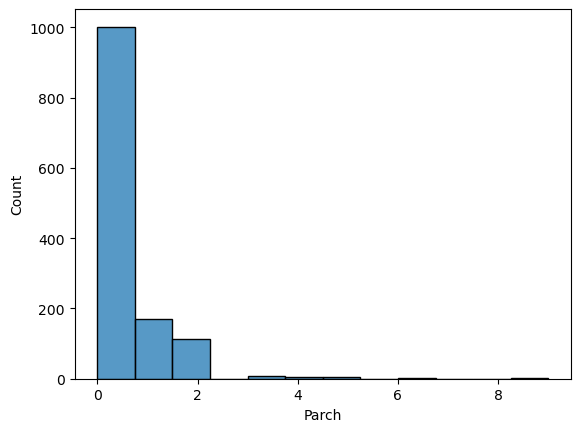

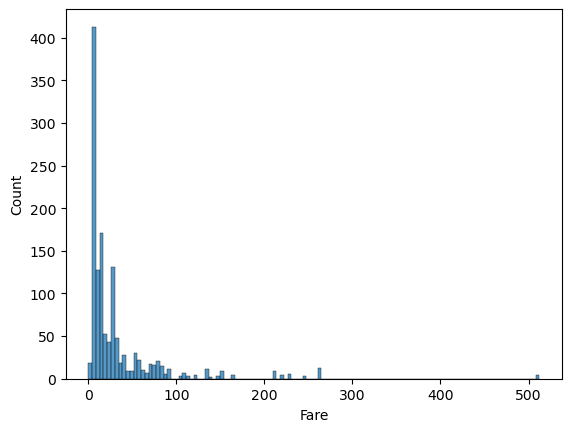

In [79]:
#EDA
#histogram to understand the distribution of data
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

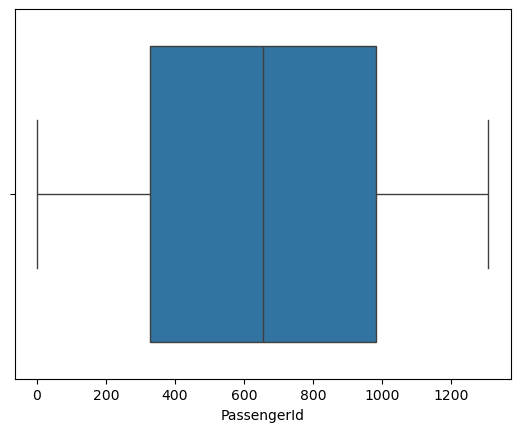

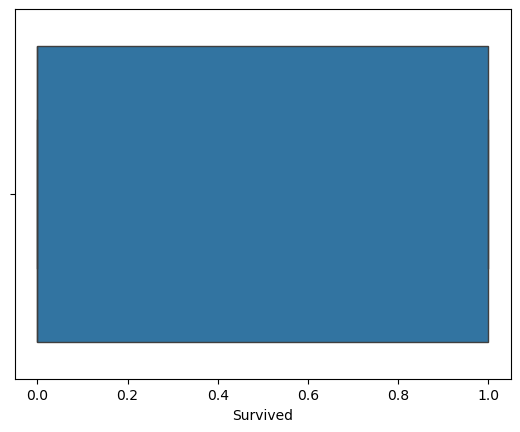

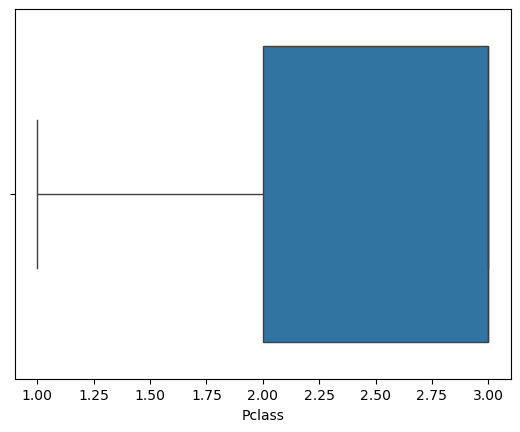

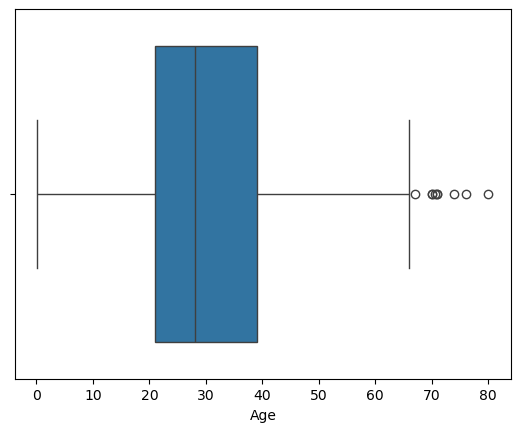

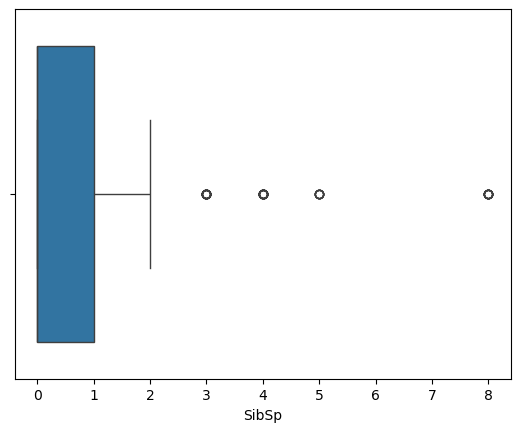

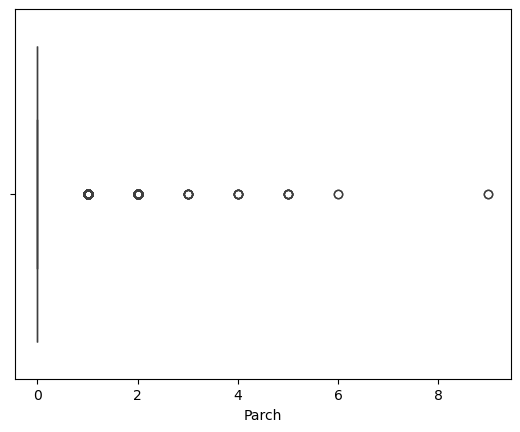

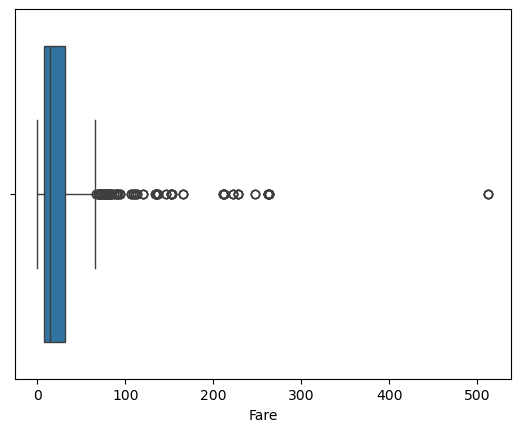

In [81]:
#boxplot to identify outliers
#check for any outliers in the data
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

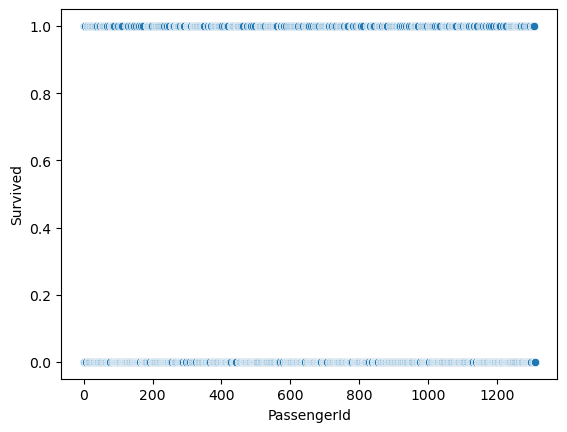

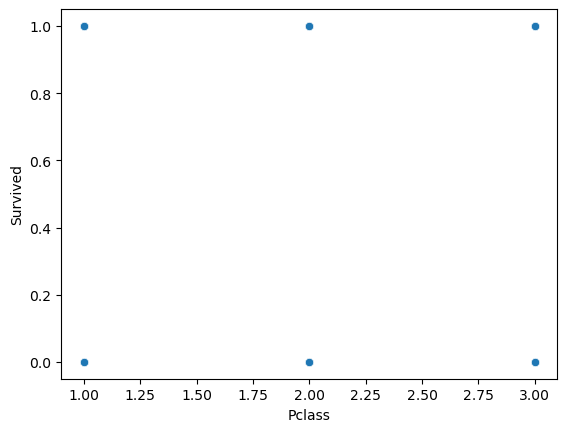

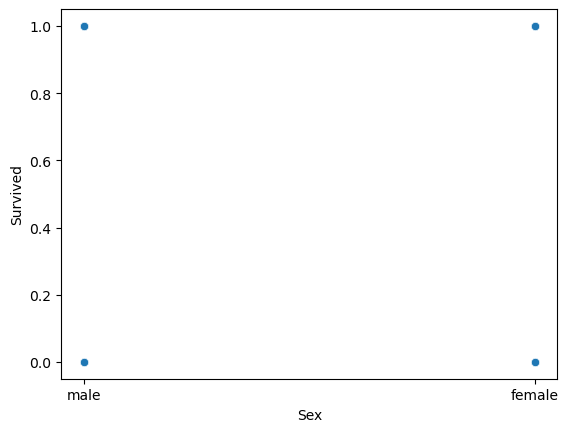

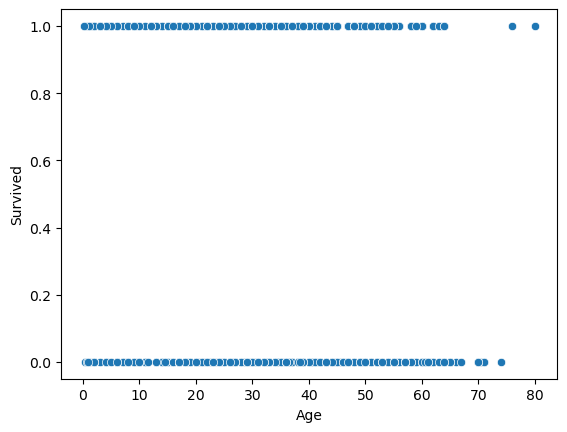

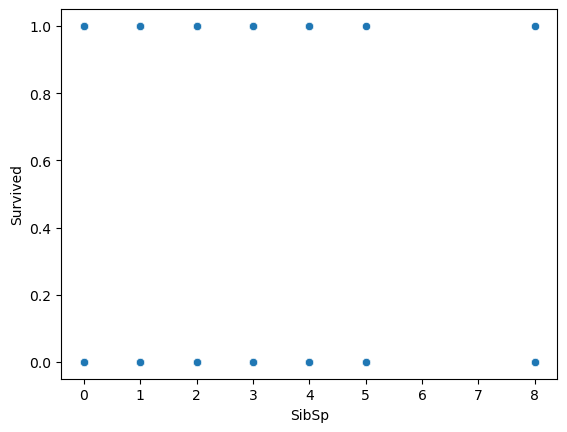

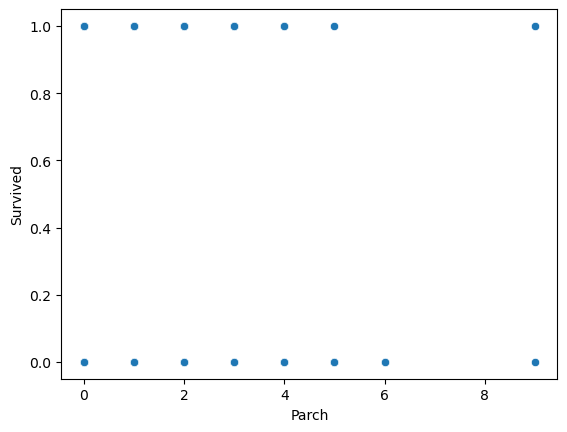

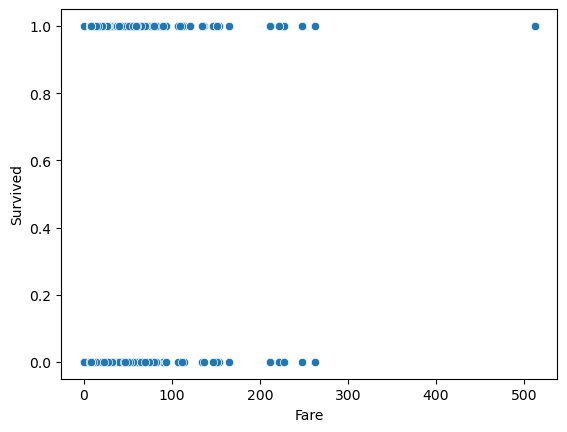

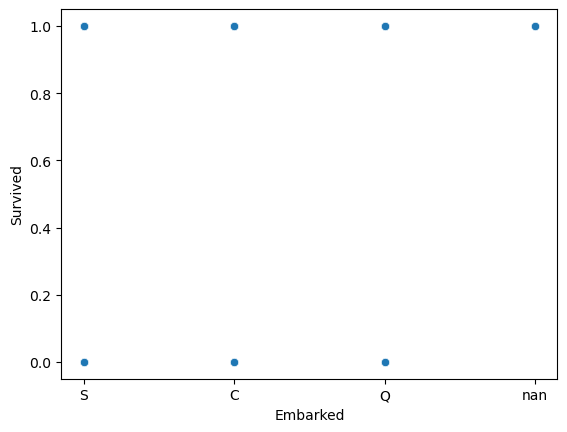

In [63]:
#scatter plot to understand the relationship
for i in ['PassengerId','Pclass','Sex', 'Age', 'SibSp',
       'Parch','Fare','Embarked']:
    sns.scatterplot(data=df,x=i,y='Survived')
    plt.show()

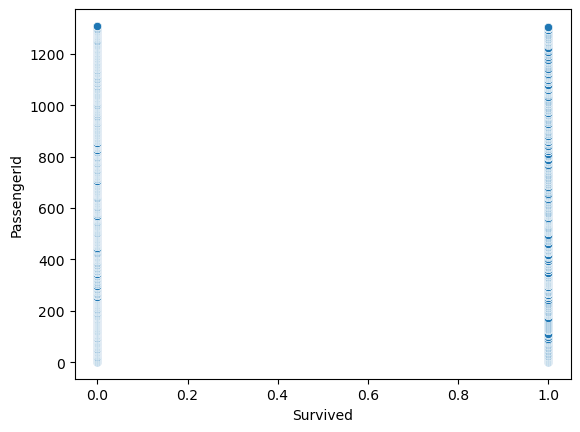

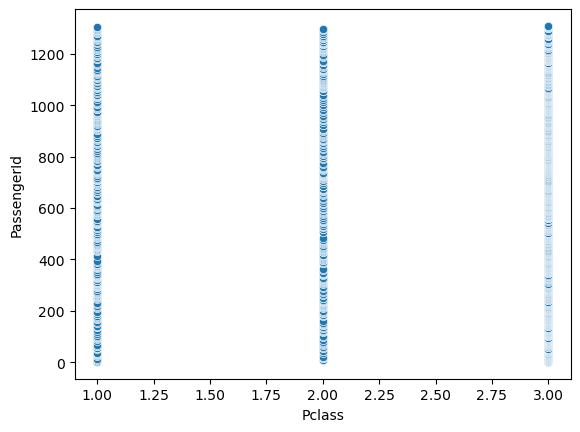

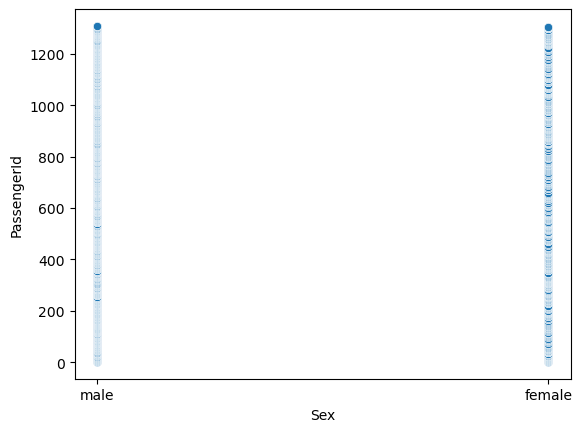

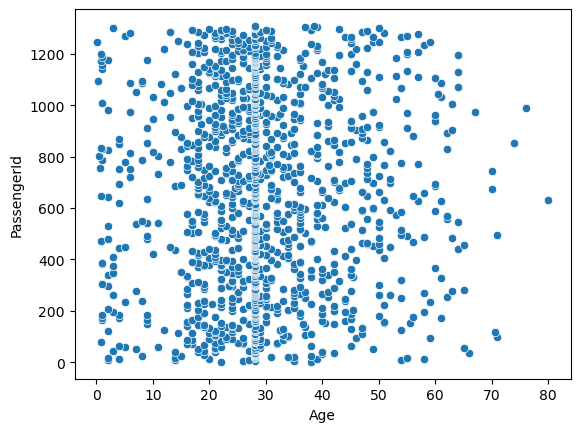

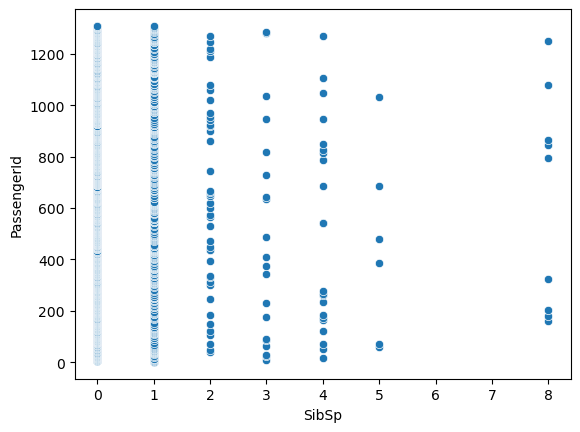

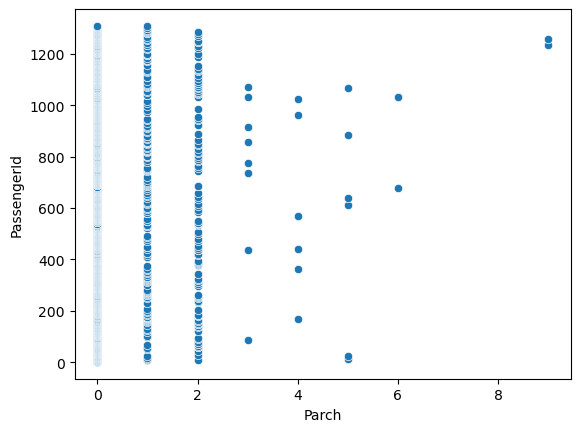

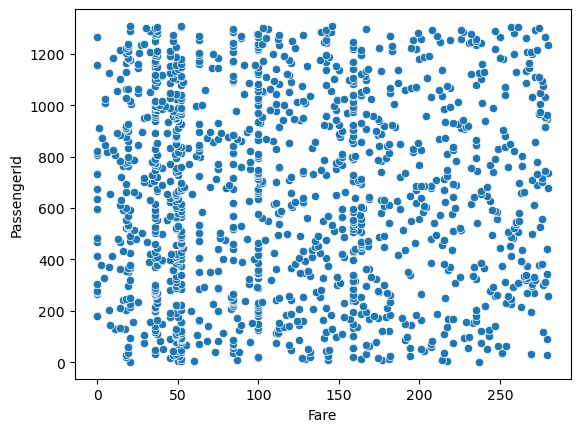

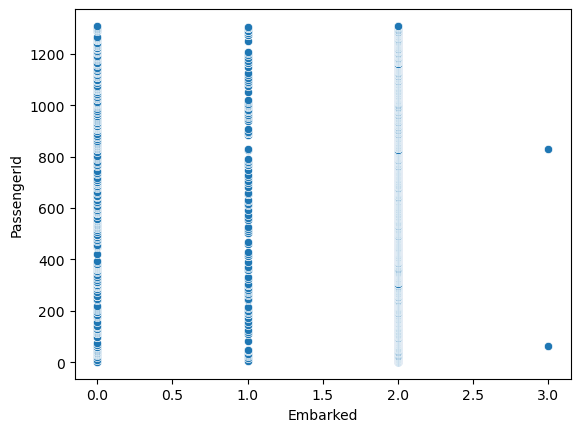

In [97]:
for i in ['Survived','Pclass','Sex', 'Age', 'SibSp',
       'Parch','Fare','Embarked']:
    sns.scatterplot(data=df,x=i,y='PassengerId')
    plt.show()

In [81]:
#correlation with heatmap to interpret the relation and muticolliarity
df.select_dtypes(include="number").corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.025799,-0.055224,0.008942,0.031128
Survived,-0.020370,1.000000,-0.264710,-0.043286,0.002370,0.108919,0.233773
Pclass,-0.038354,-0.264710,1.000000,-0.377908,0.060832,0.018322,-0.558683
Age,0.025799,-0.043286,-0.377908,1.000000,-0.189972,-0.125851,0.178182
SibSp,-0.055224,0.002370,0.060832,-0.189972,1.000000,0.373587,0.160349
Parch,0.008942,0.108919,0.018322,-0.125851,0.373587,1.000000,0.221635
Fare,0.031128,0.233773,-0.558683,0.178182,0.160349,0.221635,1.000000


<Axes: >

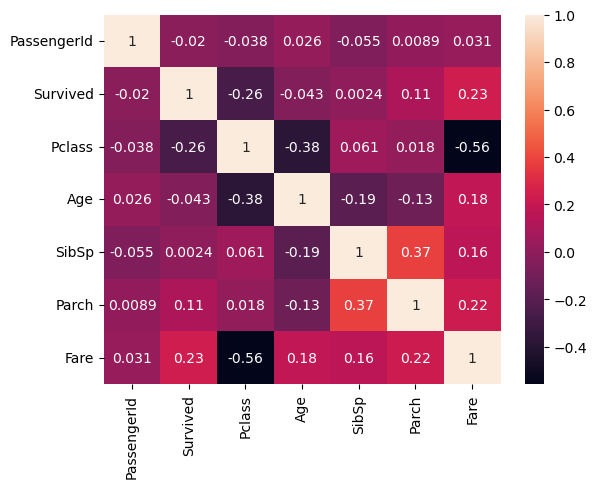

In [79]:
#plotting the heatmap
h=df.select_dtypes(include="number").corr()
sns.heatmap(h, annot=True)

In [ ]:
#Missing value treatment. Method of missing value treatment mode,mean or median or KNNIputer

In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

In [71]:
for i in ['Age','Fare']:
    df[i].fillna(df[i].median(),inplace=True)
    df.isnull().sum()

In [73]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [75]:
for i in ['Embarked']:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [77]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#handling outliers for continuous numerical data

In [143]:
def wisker(col):
    q1,q3=np.percentile(col, [25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr #lower whisker
    uw=q3+1.5*iqr #upper whisker
    return lw,uw

In [145]:
wisker(df['Age'])

(2.5, 54.5)

In [147]:
wisker(df['Fare'])

(-27.172999999999995, 66.34379999999999)

In [153]:
for i in ['Age','Fare']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

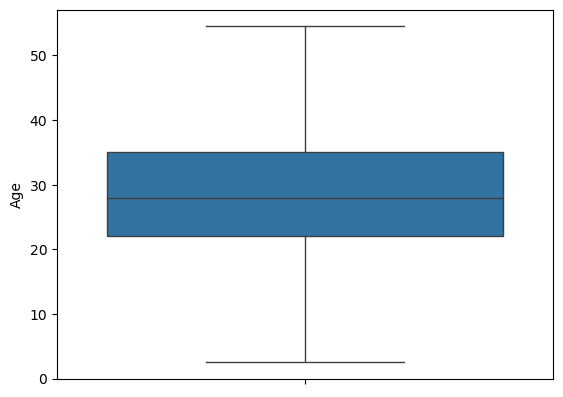

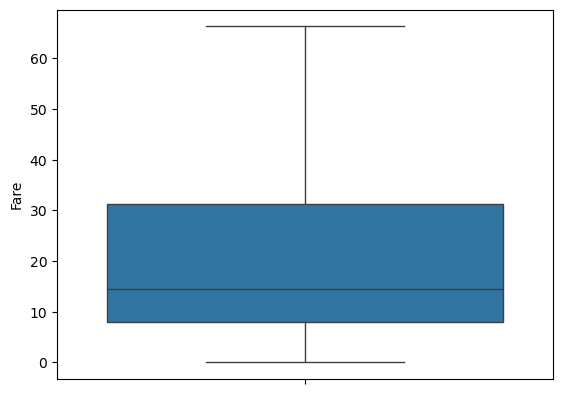

In [155]:
for i in ['Age','Fare']:
    sns.boxplot(df[i])
    plt.show()